#### 1차 가공된 공사비의 공사번호 기준 설비 갯 수 계산

In [21]:
import numpy as np
import pandas as pd
from datetime import datetime

# 사용자정의 함수: key를 입력하면 해당 데이터를 데이터프레임으로 읽어옴
from aiddd.data_manager import read_data, write_data
from aiddd.utils import show_commas

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings

plt_settings()

#### 데이터 불러오기

##### 설비 데이터

In [22]:
_start = datetime.now()
dict_data = {
    'line': read_data('2nd LINE'),
    'pole': read_data('2nd POLE'),
    'sl': read_data('2nd SL')
}
print(f'Total Elapsed Time for Data Load: {datetime.now() - _start}\nShape:', end=' ')
for _key in dict_data.keys():
    print(f'{_key}-{dict_data[_key].shape}', end=' ')

Total Elapsed Time for Data Load: 0:00:47.820142
Shape: line-(39861, 77) pole-(38390, 63) sl-(22531, 57) 

##### 공사비 데이터

In [23]:
df_cons = read_data('2nd pp cons1')

#### 설비 갯 수 계산

In [24]:
for _key in dict_data.keys():
    _sr_data_cnts = dict_data[_key]['공사번호'].value_counts()
    _col_name = f'{_key}_cnts'
    df_cons = pd.merge(
        df_cons, _sr_data_cnts.rename(_col_name),
        left_on='공사번호', right_on=_sr_data_cnts.index, 
        how='left'
    )
    df_cons[_col_name].fillna(0, inplace=True)
    df_cons[_col_name] = df_cons[_col_name].astype(int)

In [25]:
cond_pole = (df_cons['pole_cnts'] > 0) & (df_cons['pole_cnts'] <= 10)
cond_line = (df_cons['line_cnts'] > 0) & (df_cons['line_cnts'] <= 11)

df_cons[cond_pole & cond_line].shape

(15136, 18)

In [26]:
# 전체 15929에서 15136이면 793개이기 때문에 무시 가능
df_cons = df_cons[cond_pole & cond_line].reset_index(drop=True)

In [27]:
show_commas(df_cons[:30])

,공사번호,총공사비,최종변경일시,year,month,day,dayofweek,dayofyear,최종변경자사번,사번코드,사번코드숫자,사번숫자,사업소명,사업소코드,계약전력,line_cnts,pole_cnts,sl_cnts
0,477420183473,"37,874,518",2021-02-25 09:10:18,"2,021",2,25,3,56,1988103181,AAA,1,"1,988,103,181",단양지사,1,3,5,9,1
1,477420183616,"31,478,585",2021-02-25 13:52:47,"2,021",2,25,3,56,MDE1706013,MDE,3,"1,706,013",단양지사,1,5,3,5,1
2,477420183728,"30,268,679",2021-04-12 08:11:24,"2,021",4,12,0,102,MDP2100086,MDP,8,"2,100,086",단양지사,1,3,8,10,1
3,477420193243,"11,598,900",2022-11-21 17:45:02,"2,022",11,21,0,325,MDE1900011,MDE,3,"1,900,011",단양지사,1,5,6,6,1
4,477420193349,"23,535,217",2020-10-19 09:06:23,"2,020",10,19,0,293,MDE1900011,MDE,3,"1,900,011",단양지사,1,3,4,8,2
5,477420193827,"5,362,339",2020-09-07 13:51:41,"2,020",9,7,0,251,MDE1900011,MDE,3,"1,900,011",단양지사,1,3,3,3,1
6,477420203272,"3,132,017",2020-10-08 08:45:08,"2,020",10,8,3,282,MDE1900011,MDE,3,"1,900,011",단양지사,1,3,2,2,1
7,477420203306,"16,941,740",2020-10-12 17:13:21,"2,020",10,12,0,286,MDE1900011,MDE,3,"1,900,011",단양지사,1,5,3,4,1
8,477420203444,"2,585,476",2020-10-16 09:01:49,"2,020",10,16,4,290,MDE1900011,MDE,3,"1,900,011",단양지사,1,3,1,1,1
9,477420203582,"7,424,647",2020-09-02 14:36:24,"2,020",9,2,2,246,MDE1900011,MDE,3,"1,900,011",단양지사,1,5,4,1,1


#### 데이터 저장

In [28]:
write_data('2nd pp cnts1', df_cons, index=False)

#### 차트로 확인

##### 전주수 vs 공사비

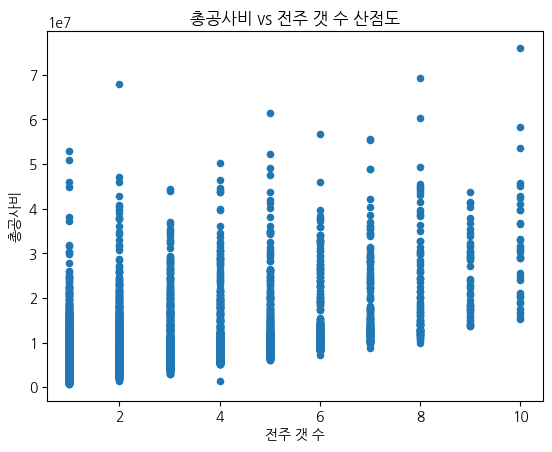

In [29]:
df_cons.plot.scatter(x='pole_cnts', y='총공사비')
plt.xlabel('전주 갯 수')
plt.ylabel('총공사비')
plt.title('총공사비 vs 전주 갯 수 산점도')
plt.show()

##### 전선수 vs 공사비

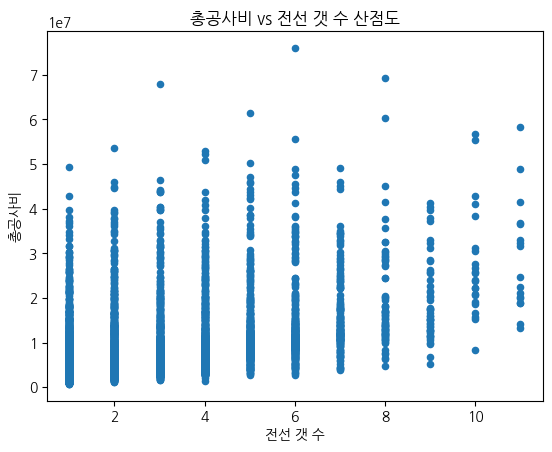

In [30]:
df_cons.plot.scatter(x='line_cnts', y='총공사비')
plt.xlabel('전선 갯 수')
plt.ylabel('총공사비')
plt.title('총공사비 vs 전선 갯 수 산점도')
plt.show()